In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Load testing dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:01<00:00, 97305572.57it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten the feature maps
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN
cnn_model = SimpleCNN()


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
# Define the loss function and optimizer
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

# Number of training epochs
epochs = 5

train_loss_history = []

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer_cnn.zero_grad()

        # Forward pass
        outputs = cnn_model(inputs)
        loss = criterion_cnn(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer_cnn.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            train_loss_history.append(running_loss / 2000)
            running_loss = 0.0




[1,  2000] loss: 0.296
[1,  4000] loss: 0.324
[1,  6000] loss: 0.357
[1,  8000] loss: 0.384
[1, 10000] loss: 0.392
[1, 12000] loss: 0.414
[2,  2000] loss: 0.224
[2,  4000] loss: 0.252
[2,  6000] loss: 0.300
[2,  8000] loss: 0.321
[2, 10000] loss: 0.335
[2, 12000] loss: 0.349
[3,  2000] loss: 0.187
[3,  4000] loss: 0.231
[3,  6000] loss: 0.250
[3,  8000] loss: 0.262
[3, 10000] loss: 0.289
[3, 12000] loss: 0.321
[4,  2000] loss: 0.166
[4,  4000] loss: 0.197
[4,  6000] loss: 0.211
[4,  8000] loss: 0.226
[4, 10000] loss: 0.238
[4, 12000] loss: 0.291
[5,  2000] loss: 0.149
[5,  4000] loss: 0.166
[5,  6000] loss: 0.176
[5,  8000] loss: 0.239
[5, 10000] loss: 0.211
[5, 12000] loss: 0.245


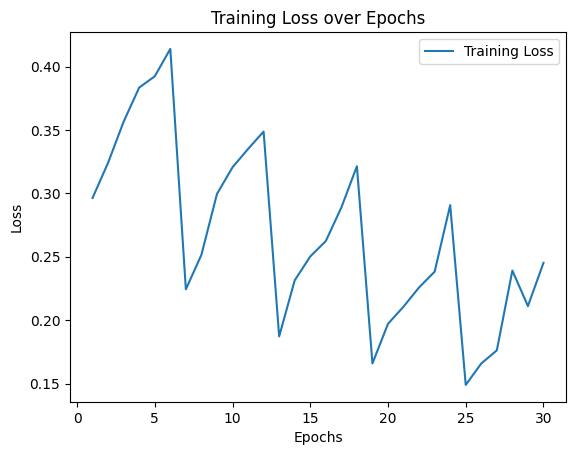

Finished Training


In [ ]:
# Plotting the training loss if there is data to plot
if train_loss_history:
    plt.plot(np.arange(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("No training loss data to plot.")

print('Finished Training')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Set random seed for reproducibility
torch.manual_seed(26)

# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        #connection layers
        #the first layer assume RGB with input size of 32x32x32 which would give an out put size of 256
        self.fc1 = nn.Linear(32 * 32 * 3, 256)  # Input size 256
        self.fc2 = nn.Linear(256, 128)          # Input size: 256, Output size: 128
        #output size of 10 just set as we are using that many classes for classification step
        self.fc3 = nn.Linear(128, 10)          #Input size: 128 output size: 10
        self.relu = nn.ReLU()

    def forward(self, x):
        #format the input by converting the 3d image to 1d
        x = x.view(-1, 32 * 32 * 3)
        #apply ReLU, activation function forward pass
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ANN()

# Loss function and optimizer functions

criterion = nn.CrossEntropyLoss()
#optimizer in PyTorch uses algorithms to upate the weights and biases of the NN
optimize = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model on 10 passes 1 epoch consists of a forward pass. backward pass and then we update the parameters
epochs = 10

for epoch in range(epochs):
    for inputs, labels in train_loader:
        #optimize each gradiant
        optimize.zero_grad()
        outputs = model(inputs)
        #check the loss and then update the optimizer using backpropagation "backward()"
        loss = criterion(outputs, labels)
        loss.backward()
        optimize.step()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Evaluate the model using our test set
model.eval()
correct = 0
total = 0
#using no gradiant as its more efficient
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        #make predictions on the test data
        #if a predicted label is within the true labels then we can store it in the correct variable.
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')